In [4]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp,wilcoxon,shapiro
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
A=pd.read_csv('car_sales (2).csv',index_col=0)

In [5]:
A.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [6]:
A['Price'].describe()

count    93.000000
mean     19.509677
std       9.659430
min       7.400000
25%      12.200000
50%      17.700000
75%      23.300000
max      61.900000
Name: Price, dtype: float64

In [8]:
shapiro(A['Price'])  #returns test statistics and p value 
#P value is less than .05 so data is not normal

(0.8805127143859863, 4.2348321471763484e-07)

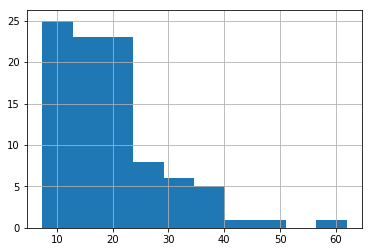

In [13]:
A['Price'].hist()

In [9]:
import copy
B=copy.deepcopy(A)

In [10]:
B['Price']=np.log(A['Price']) # Taking log will get the data to be normal Natural log

In [11]:
shapiro(B['Price']) # We have made the data normal by taking log

(0.9841008186340332, 0.3199950158596039)

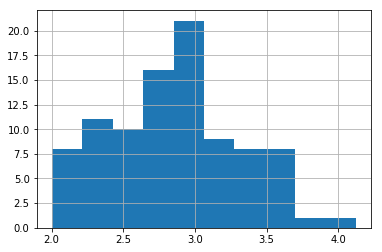

In [12]:
B['Price'].hist() #we can see the data to be normal by plotting histogram

In [14]:
A['Price'][:2]

1    15.9
2    33.9
Name: Price, dtype: float64

In [15]:
B['Price'][:2] #after taking log

1    2.766319
2    3.523415
Name: Price, dtype: float64

In [16]:
np.exp(B['Price'][:2]) #converting back to normal value

1    15.9
2    33.9
Name: Price, dtype: float64

In [17]:
A["Price"].mean()

19.509677419354837

In [18]:
B['Price'].mean()

2.865451550530824

In [45]:
# Randomly Pick 30 samples from A['Price']
import random
samp_data=random.sample(B['Price'].values.tolist(),40) #.values.tolist is to convert to list

In [22]:
samp_data

[2.6026896854443837,
 3.8691155044168695,
 3.3568971227655755,
 3.370738174177447,
 2.791165107812717,
 3.586292865338835,
 2.5257286443082556,
 2.9338568698359038,
 3.332204510175204,
 3.269568939183719,
 2.631888840136646,
 2.501435951739211,
 3.122364924487357,
 2.128231705849268,
 3.6375861597263857,
 2.7013612129514133,
 2.91235066461494,
 2.9806186357439426,
 3.2846635654062037,
 2.747270914255491,
 2.302585092994046,
 2.8735646395797834,
 2.2082744135228043,
 3.1654750481410856,
 3.5467396869528134,
 3.122364924487357,
 3.535145354171894,
 3.462606009790799,
 2.803360380906535,
 2.760009940032921]

In [46]:
m = np.mean(samp_data)  # finding mean of sample data
m

2.849823585973787

In [47]:
s=np.std(samp_data) #finding standard deviation of samp data
s

0.5071333629902923

In [48]:
tdata = (m-2.77)/(s/np.sqrt(40)) #finding t stat of samp data log(16) we set as H0 
tdata

0.9954949175145027

In [36]:
np.log(20)

2.995732273553991

In [49]:
tdata = (m-2.9957)/(s/np.sqrt(40)) #finding t stat of samp data log(20) we set as H0 
tdata

-1.8192521292644523

In [52]:
# one sample t test
#null hypothesis : expected value = 2.9957 corresponds to 20 lacs
t_statistics,p_value = ttest_1samp(samp_data,2.9957)
print(t_statistics,p_value)

-1.796367543707972 0.08018523906460774


In [64]:
a_data = [24,25,24,23,24,25]

In [54]:
a_data

[24, 25, 24, 23, 24, 25, 30]

In [59]:
shapiro(a_data)

(0.8662614226341248, 0.2117050290107727)

In [63]:
t_statistics,p_value = ttest_1samp(a_data,24)
print(t_statistics,p_value)

0.5423261445466443 0.6108811833962531


In [88]:
b_data= [24,24,25,24,24,22,21,24,24,24,24,24,24,25,25,22,22,30,21,23,23,23,21]

In [89]:
shapiro(b_data) #to check whether data is normal or not

(0.8135339617729187, 0.0006360384868457913)

In [90]:
#for parametric data one sample wilcoxon test
z_statistics,p_value=wilcoxon(np.array(b_data)-24)
print("one sample wilcoxon test p value",p_value)

one sample wilcoxon test p value 0.11921634485454125


In [91]:
t_statistics,p_value = ttest_1samp(b_data,24) # for normal distributed data
print(t_statistics,p_value)

-0.9999999999999974 0.3281832618806718


In [96]:
# calculating power of test
# compute the difference in means between population and sample and divide it by standard deviation
#set the number of observations
#set the alpha value and alternative values 'two sided','larger','smaller'

delta=(np.mean(b_data)-24)/np.std(b_data)

In [93]:
len(b_data) #to check no of observation

23

In [97]:
print(ttest_power(delta,nobs=22,alpha=0.05,alternative='two-sided'))

0.15918698980920581
